In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [4]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
293822  2017   293823     1           12    26      160.0        60.0  89.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
293822    1.0    1.0  ...   16.0   1.0   1.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
293822      NaN           NaN NaN  20181126  

[1 rows x 34 columns]

# 📌 Q1. 
연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!
```
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}
```

In [5]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [12]:
df['연령대'] = df['연령대코드(5세단위)'].map(age_code)
df['연령대']

0         60~64세
1         35~39세
2         35~39세
3         55~59세
4         35~39세
           ...  
999995    40~44세
999996    40~44세
999997    55~59세
999998    50~54세
999999    40~44세
Name: 연령대, Length: 1000000, dtype: object

In [15]:
df.pivot_table(index='연령대',values='허리둘레',aggfunc='describe')

25%   50%   75%     count    max       mean   min        std
연령대                                                                  
20~24세  67.5  73.4  81.0   23244.0  999.0  75.152220  47.5  12.251781
25~29세  69.0  76.5  84.2   64898.0  999.0  77.704783  48.0  16.735734
30~34세  72.0  80.1  88.0   77517.0  999.0  81.089268  49.0  22.988111
35~39세  75.0  82.0  89.0   84621.0  999.0  82.094012   9.2  14.522095
40~44세  73.0  80.0  87.0  130912.0  999.0  80.488308  42.1  10.803098
45~49세  74.0  81.0  87.0  118357.0  137.0  80.822449  40.0   9.521622
50~54세  75.0  81.0  87.0  129833.0  142.0  81.062754   6.5   9.095438
55~59세  76.0  82.0  87.5  112175.0  139.0  81.799905  32.0   8.730398
60~64세  77.0  83.0  88.0  106491.0  137.0  82.722769   0.0   8.596176
65~69세  78.0  83.5  89.0   53624.0  129.0  83.588500  50.0   8.443542
70~74세  78.0  84.0  90.0   51586.0  129.8  84.063372  51.0   8.539639
75~79세  78.0  84.0  90.0   25972.0  122.0  84.200127  50.0   8.772306
80~84세  78.0  84.0  90.0   16205.0  120.0  83.751435  38.0   9.041091
85세+    75.0  81.5  88.0    4125.0  999.0  81.736703  34.0  17.325969

# 📌Q2. 
"음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.

In [22]:
df_heatmap = df[["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]]
df_heatmap

음주여부  흡연상태  연령대코드(5세단위)  성별코드
0        0.0   3.0           13     1
1        0.0   1.0            8     2
2        0.0   1.0            8     1
3        1.0   1.0           12     2
4        0.0   3.0            8     1
...      ...   ...          ...   ...
999995   1.0   1.0            9     2
999996   0.0   1.0            9     2
999997   0.0   1.0           12     2
999998   1.0   2.0           11     1
999999   0.0   1.0            9     2

[1000000 rows x 4 columns]

In [24]:
df_corr = df_heatmap.corr()
df_corr

음주여부      흡연상태  연령대코드(5세단위)      성별코드
음주여부         1.000000  0.352014    -0.283296 -0.368630
흡연상태         0.352014  1.000000    -0.125714 -0.588491
연령대코드(5세단위) -0.283296 -0.125714     1.000000  0.080093
성별코드        -0.368630 -0.588491     0.080093  1.000000

<AxesSubplot:>

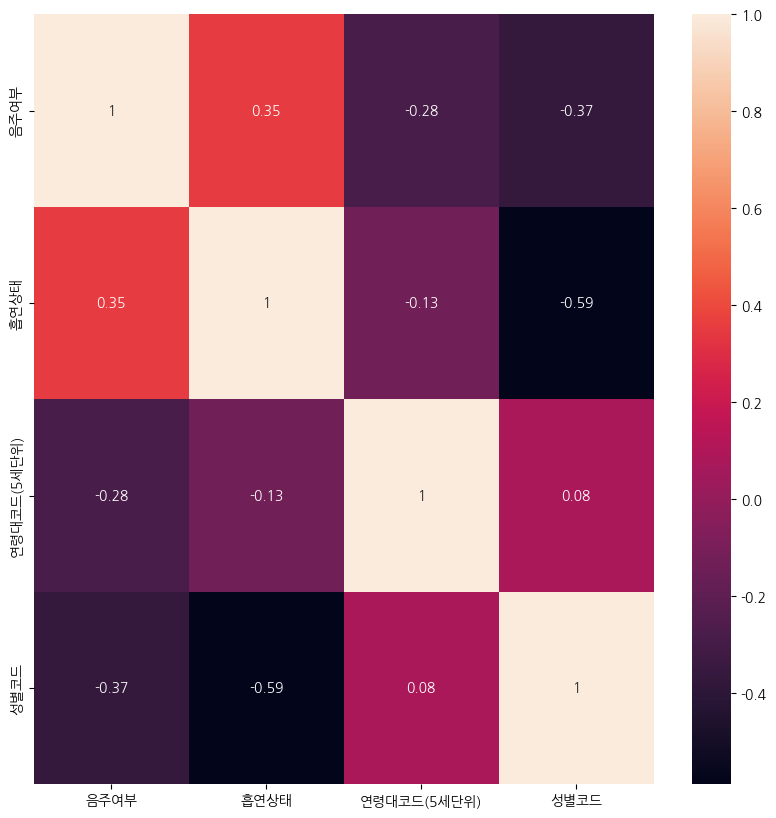

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True)

# 📌 Q3. 
흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

** 이 문제는 마무리를 못했습니다 ㅜㅡㅜ**

In [40]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# df["흡연"]
# df["음주"]

In [41]:
df_q3 = df.copy()
df_q3.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  \
0  2017        1     1           13    46      170.0        65.0  91.0    1.0   
1  2017        2     2            8    41      150.0        45.0  73.4    1.2   
2  2017        3     1            8    45      175.0        75.0  94.0    1.0   
3  2017        4     2           12    11      155.0        55.0  67.5    0.9   
4  2017        5     1            8    41      175.0        75.0  93.0    1.5   

   시력(우)  ...  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  제3대구치(사랑니)이상  \
0    1.2  ...   3.0   0.0          1      NaN    NaN      NaN           NaN   
1    1.0  ...   1.0   0.0          1      NaN    NaN      NaN           NaN   
2    0.8  ...   1.0   0.0          1      NaN    NaN      NaN           NaN   
3    1.0  ...   1.0   1.0          0      NaN    NaN      NaN           NaN   
4    1.5  ...   3.0   0.0          0      NaN    NaN      NaN           NaN   

    치석   데이터공개일자     연령대  
0  1.0  20181126  60~64세  
1  1.0  20181126  35~39세  
2  0.0  20181126  35~39세  
3  NaN  20181126  55~59세  
4  NaN  20181126  35~39세  

[5 rows x 35 columns]

In [42]:
display(df_q3['흡연상태'].isnull().sum(),df_q3['음주여부'].isnull().sum())

160

525

In [43]:
df_q3 = df_q3.dropna()
display(df_q3['흡연상태'].isnull().sum(),df_q3['음주여부'].isnull().sum())

0

0

In [44]:
df_q3.replace({'흡연상태': smoke}, inplace=True)
df_q3.replace({'음주여부': drink}, inplace=True)

In [45]:
df_q3

Empty DataFrame
Columns: [기준년도, 가입자일련번호, 성별코드, 연령대코드(5세단위), 시도코드, 신장(5Cm단위), 체중(5Kg 단위), 허리둘레, 시력(좌), 시력(우), 청력(좌), 청력(우), 수축기혈압, 이완기혈압, 식전혈당(공복혈당), 총콜레스테롤, 트리글리세라이드, HDL콜레스테롤, LDL콜레스테롤, 혈색소, 요단백, 혈청크레아티닌, (혈청지오티)AST, (혈청지오티)ALT, 감마지티피, 흡연상태, 음주여부, 구강검진 수검여부, 치아우식증유무, 결손치유무, 치아마모증유무, 제3대구치(사랑니)이상, 치석, 데이터공개일자, 연령대]
Index: []

[0 rows x 35 columns]

# 📌 Q4. 
체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

In [49]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자', '연령대'],
      dtype='object')

In [53]:
df_over120 = df[df['체중(5Kg 단위)']>=120.0].copy()
df_over120['체중(5Kg 단위)'].describe()

count    1181.000000
mean      126.325148
std         8.738244
min       120.000000
25%       120.000000
50%       125.000000
75%       130.000000
max       180.000000
Name: 체중(5Kg 단위), dtype: float64

<AxesSubplot:xlabel='총콜레스테롤', ylabel='감마지티피'>

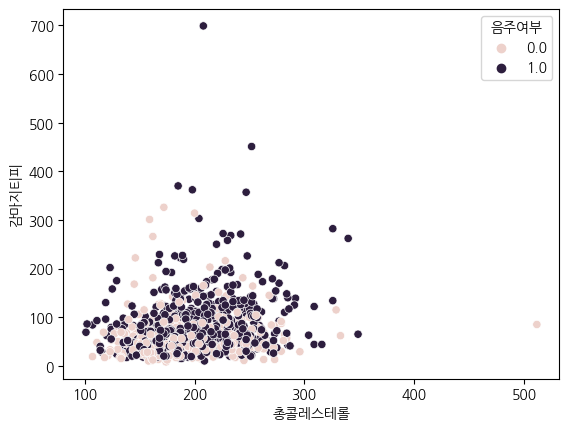

In [54]:
sns.scatterplot(data=df_over120,x='총콜레스테롤',y='감마지티피',hue='음주여부')

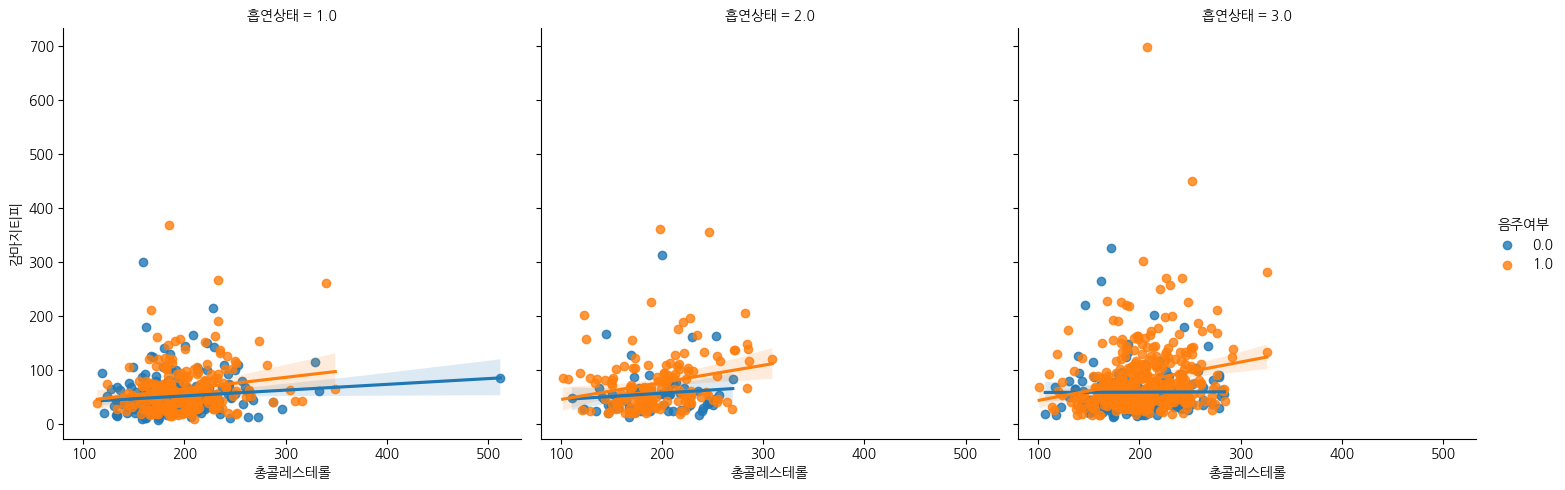

In [55]:
sns.lmplot(data=df_over120,x='총콜레스테롤',y='감마지티피',hue='음주여부',col='흡연상태')

# 📌 Q5. 
연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

In [58]:
df_eyes = df[['성별코드', '연령대코드(5세단위)', '시력(좌)', '시력(우)']].copy()
df_eyes.sample()

성별코드  연령대코드(5세단위)  시력(좌)  시력(우)
380120     1            8    1.2    1.2

In [59]:
df_eyes=df_eyes.sort_values(by=['연령대코드(5세단위)'])
df_eyes.replace({'연령대코드(5세단위)':age_code},inplace=True)
df_eyes.rename(columns={'연령대코드(5세단위)':'연령대'},inplace=True)
df_eyes.sample()

성별코드     연령대  시력(좌)  시력(우)
431589     2  50~54세    1.0    1.2

<AxesSubplot:xlabel='시력(우)', ylabel='연령대'>

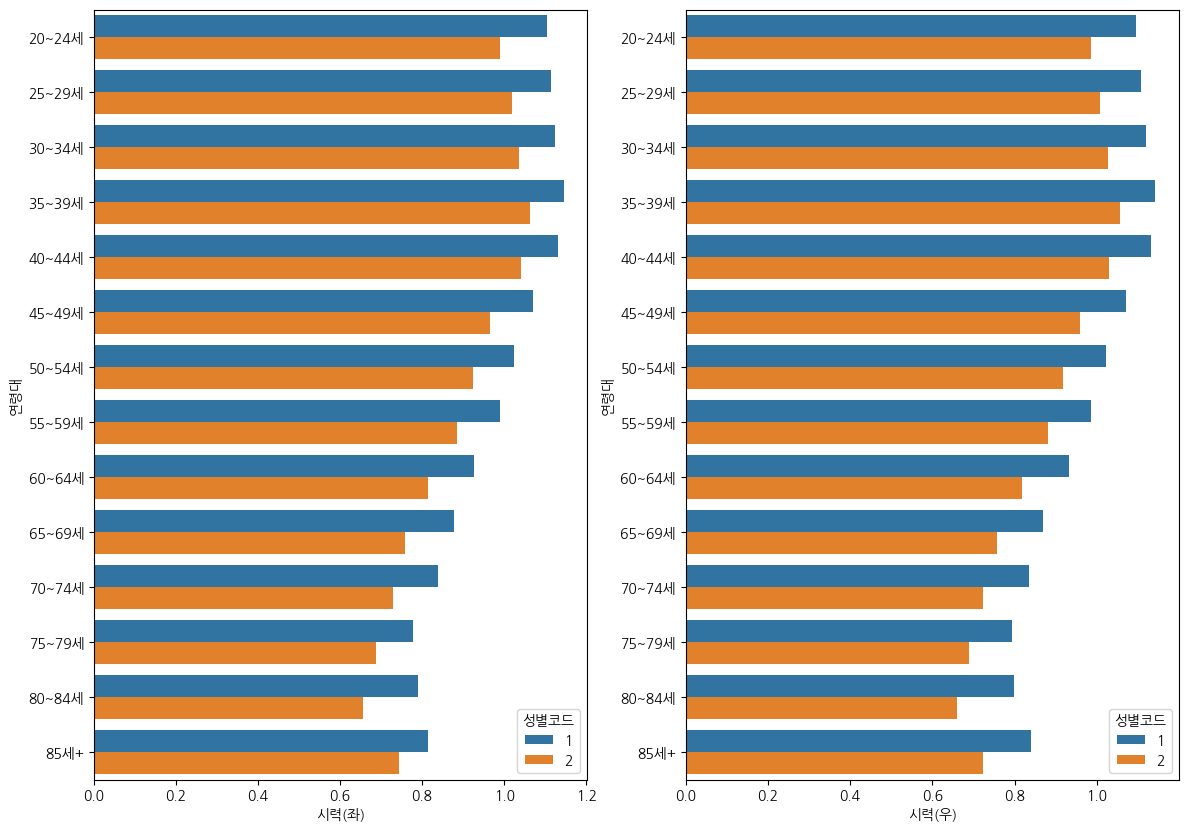

In [65]:
a = plt.figure(figsize=(14,10))
a.add_subplot(1,2,1)
sns.barplot(data=df_eyes,x='시력(좌)',y='연령대', hue='성별코드',errorbar=None)
a.add_subplot(1,2,2)
sns.barplot(data=df_eyes,x='시력(우)',y='연령대', hue='성별코드',errorbar=None)